<a href="https://colab.research.google.com/github/yeonghun00/dc/blob/main/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import requests
import datetime

In [2]:
def view_page(url, gall_num):
  try:
    url = url + str(gall_num)
    result = requests.get(url, headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'})
    bs_obj = BeautifulSoup(result.content, "html.parser")

    gall_num = gall_num
    title = bs_obj.find_all('span', {'class': 'title_subject'})[0].text
    content = bs_obj.find_all('div', {'class': 'write_div'})[0].text

    good = int(bs_obj.find_all('p', {'class': 'up_num'})[0].text)
    bad = int(bs_obj.find_all('p', {'class': 'down_num'})[0].text)

    date = bs_obj.find_all('span', {'class': 'gall_date'})[0].text
    views = bs_obj.find_all('span', {'class': 'gall_count'})[0].text
    comments = bs_obj.find_all('span', {'class': 'gall_comment'})[0].text

    date = datetime.datetime.strptime(date, '%Y.%m.%d %H:%M:%S')
    views = int(''.join(list(filter(str.isdigit, views))))
    comments = int(''.join(list(filter(str.isdigit, comments))))

    return [gall_num, date, title, content, good, bad, views, comments]
  except:
    pass

In [3]:
from multiprocessing import Pool

url = 'https://gall.dcinside.com/mgallery/board/view/?id=kospi&no='
current_id = 2373056
num = 500

with Pool() as p:
    galls = p.starmap(view_page, list(zip([url]*num, [x for x in range(current_id - num, current_id)])))

In [4]:
import pandas as pd

df = pd.DataFrame([x for x in galls if x!=None], columns=['id', 'datetime', 'title', 'content', 'good', 'bad', 'views', 'comments'])

In [5]:
df['content'] = [x.replace('\n',' ').replace('- dc official App', '') for x in df['content']]

In [6]:
df

,id,datetime,title,content,good,bad,views,comments
0,2372556,2022-09-26 17:56:16,정부 기관 개미 셋다 숏치면 호로개미새끼들앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,지수방어는 누가하놐ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,0,0,65,1
1,2372557,2022-09-26 17:56:17,정은이 딸이라는데 이쁜거냐?,설주 얼굴 살짝 들어간거 같기도 하고,1,0,157,5
2,2372558,2022-09-26 17:56:35,달러 스왑은 한번 하면 기간이 얼마야?,왜 맨날 했다 안했다 했다 안했다 이럼?,0,0,13,0
3,2372559,2022-09-26 17:56:36,써킷도 안터졌는데 무슨 검은 월요일 ㅇㅈㄹ,,0,0,23,0
4,2372560,2022-09-26 17:56:46,이번주내내 반대매매 나올건데 뭔 롱이야 ㅋㅋㅋㅋㅋㅋㅋ,뒤져걍ㅋㅋㅋㅋㅋㅋㅋㅋㅋ,0,0,30,0
...,...,...,...,...,...,...,...,...
466,2373051,2022-09-26 21:45:44,10월 중순부터 찐반 나오는 이유 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,,0,0,48,0
467,2373052,2022-09-26 21:46:58,충격] 허경영 대통령 취임 1호 공약 .jpg,취임즉시한미스와프&한일스와프 강화하여 환율방어하겠다 ㄷㄷ??? : 허경영 사기꾼 ...,2,2,47,1
468,2373053,2022-09-26 21:47:48,바야흐로 단풍의 계절이 임박햇다,가까운 뒷산 산행이라도 좀 해라미리 묫자리도 봐둘 겸달콤한 색감이 물들어 조금씩정...,2,0,11,0
469,2373054,2022-09-26 21:48:30,파이프라인 안만들어논 재테크좆밥 없제??ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,쿠팡 출발 컄ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,0,0,26,0


In [7]:
# korean font
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip'
!unzip "NotoSansCJKkr-hinted.zip"
!mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/

--2022-09-26 12:55:49--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 172.253.115.128, 2607:f8b0:4004:c06::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip’

NotoSansCJKkr-hinte 100%[===================>] 115.55M   103MB/s    in 1.1s    

2022-09-26 12:55:51 (103 MB/s) - ‘NotoSansCJKkr-hinted.zip’ saved [121163981/121163981]

Archive:  NotoSansCJKkr-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKkr-Black.otf  
  inflating: NotoSansCJKkr-Bold.otf  
  inflating: NotoSansCJKkr-DemiLight.otf  
  inflating: NotoSansCJKkr-Light.otf  
  inflating: NotoSansCJKkr-Medium.otf  
  inflating: NotoSansCJKkr-Regular.otf  
  inflating: NotoSansCJKkr-Th

In [8]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 46.9 MB/s 


In [9]:
from konlpy.tag import Hannanum
from wordcloud import WordCloud
import matplotlib.pyplot as plt

class Analyser:
  def __init__(self, df):
    self.df = df

  def get_tokenized(self, text):
    hannanum = Hannanum()
    return hannanum.morphs(text) 

  def get_cleaned(self, text):
    text = ([x for x in text if len(x) > 1])
    d = {i:text.count(i) for i in set(text) if text.count(i) > 1}
    words = ' '.join(d.keys())
    return words

  def get_wordcloud(self, column=''):
    t = analyser.df[column]
    words = self.get_tokenized(' '.join(t))
    words = self.get_cleaned(words)
    words = words.split()
    text = ' '.join(words)
    stop_words = []
    wordcloud = WordCloud(stopwords = stop_words, \
                          font_path='/usr/share/fonts/truetype/NotoSansCJKkr-Medium.otf', \
                          background_color='white', \
                          width=1200, height=800).generate(text)
    plt.figure(figsize=(18,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

In [10]:
analyser = Analyser(df)

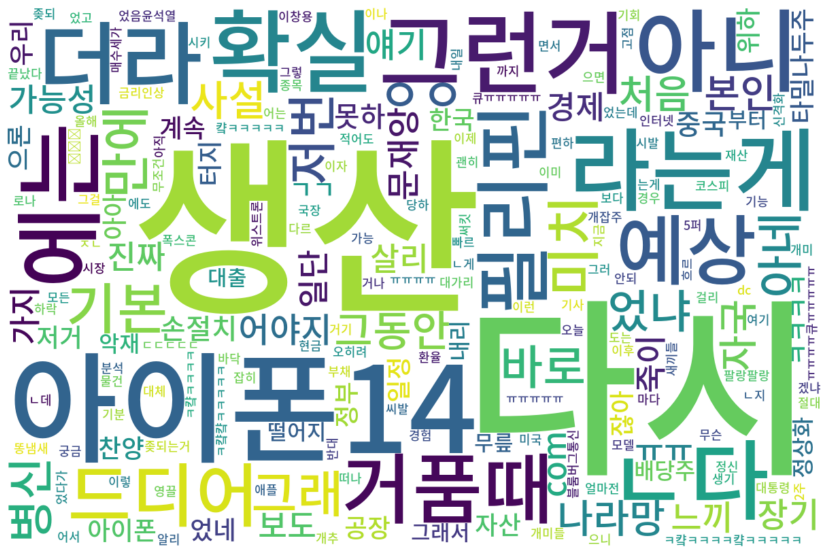

In [11]:
analyser.get_wordcloud('content')